81.540007425512

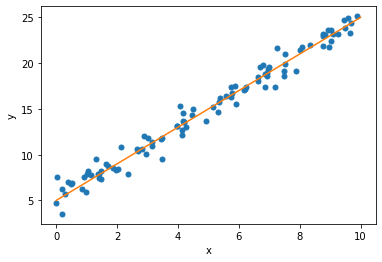

In [ ]:
import numpy as np
import scipy.stats as ss
import matplotlib.pyplot as plt

n=100
beta_1=5
beta_2=2
np.random.seed(1)
x=10*ss.uniform.rvs(size=n)
y=beta_1+beta_2*x+ss.norm.rvs(loc=0,scale=1,size=n)

plt.figure()
plt.plot(x,y,'o',ms=5)
xx=np.array([0,10])
plt.plot(xx,beta_1+beta_2*xx)
plt.xlabel("x")
plt.ylabel("y")
beta_1+beta_2*xx
x.mean()

def compute_rss(y_estimate, y):
  return sum(np.power(y-y_estimate, 2))
def estimate_y(x, b_0, b_1):
  return b_0 + b_1 * x
rss = compute_rss(estimate_y(x, beta_1, beta_2), y)
rss

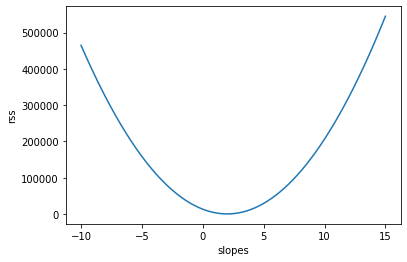

In [ ]:
rss=[]
slopes=np.arange(-10,15,0.0001)
for slope in slopes:
  rss.append(np.sum((y-beta_1-slope*x)**2))
ind_min=np.argmin(rss)
plt.figure()
plt.plot(slopes,rss)
plt.xlabel("slopes")
plt.ylabel("rss")
slopes[ind_min]


In [ ]:
import statsmodels.api as sm

#mod=sm.OLS(y, x)
#est=mod.fit()
#print(est.summary())
X=sm.add_constant(x)
mod=sm.OLS(y, X)
est=mod.fit()
print(est.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.977
Model:                            OLS   Adj. R-squared:                  0.977
Method:                 Least Squares   F-statistic:                     4115.
Date:                Sat, 12 Sep 2020   Prob (F-statistic):           7.47e-82
Time:                        06:54:46   Log-Likelihood:                -130.72
No. Observations:                 100   AIC:                             265.4
Df Residuals:                      98   BIC:                             270.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          5.2370      0.174     30.041      0.0

Text(0.5, 0, '$x_3$')

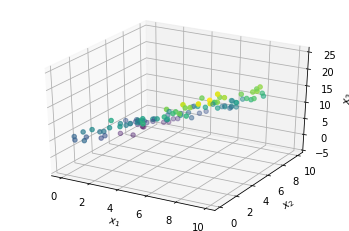

In [ ]:
## Scikit learn for linear regression
n=100
beta_0=5
beta_1=2
beta_2=-1
np.random.seed(1)
x_1=10*ss.uniform.rvs(size=n)
x_2=10*ss.uniform.rvs(size=n)
y=beta_0+beta_1*x_1+beta_2*x_2+ss.norm.rvs(loc=0,scale=1,size=n)
X=np.stack([x_1,x_2],axis=1)
from mpl_toolkits.mplot3d import Axes3D
fig=plt.figure()
ax=fig.add_subplot(111,projection='3d')
ax.scatter(X[:,0],X[:,1], y, c=y])
ax.set_xlabel("$x_1$")
ax.set_ylabel("$x_2$")
ax.set_zlabel("$x_3$")

In [ ]:
from sklearn.linear_model import LinearRegression
lm=LinearRegression(fit_intercept=True)
lm.fit(X, y)
lm.intercept_
lm.coef_[0]
lm.coef_[1]
print(lm.score(X, y))
X_0 = np.array([2, 4])
lm.predict(X_0.reshape(1, -1))

0.9773424925041747


array([5.14894957])

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test=train_test_split(X, y, train_size=0.5, random_state=1)
lm=LinearRegression(fit_intercept=True)
lm.fit(X_train, y_train)
lm.score(X_test, y_test)
#lm.predict(X_test, y_test)


0.9733678561169896